### This notebook focuses on plotting the 3D plot of each recording session

In [1]:
# from google.colab import drive
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
PATH_TO_DATA = "../pfmdData/data_heatMap_3D"
PATH_TO_GROUND_TRUTH = "../pfmdData/ground_truth_values.csv"

### Load data into dictrionary

#### This reads into dictionary by track session names "z_up" "z_right", each key leads to the another dictionary representing the session, with each track case as keys again

In [3]:
data = {}
# read data_files into a dictionary
ground_truth = pd.read_csv(PATH_TO_GROUND_TRUTH, index_col=0)
for file_name in ground_truth.index:
#     print(file_name)
    # get file name here: convert ".csv" to track name
    temp0 = ground_truth.loc[file_name, 'name']
    
    # get z_measured by human
    truth = ground_truth.loc[file_name, 'ground_truth']
#     print(temp)
    temp1 = temp0.split("_")
    track_case = temp1[0] # this is same as folder name
    for i in range(1,len(temp1)-1):
        track_case = track_case + '_' + temp1[i] 
    
    # read track data
    track = pd.read_csv(PATH_TO_DATA + '/' + track_case + '/' + file_name)
    
    # Find the ground truth axis
    axis = temp1[0] + '_cm'
    # Create a column of error from ground truth
    track['truth_err'] = abs(track[axis] - (truth*100))
    track['z_measured'] = truth*100
    if track_case not in data:
        print("added new session key: ", track_case, '\n')
        data[track_case] = {}
    data[track_case][temp0]= track

#         print("added new track: ", temp0)
print("----done----")
# for folder in os.listdir(PATH_TO_DATA):
#     print("current", folder,"length: ",len(data[folder]))
#     print("dict keys: ", data[folder].keys(), "\n")

FileNotFoundError: [Errno 2] No such file or directory: '../pfmdData/ground_truth_values.csv'

##### Normalize Function definition

In [ ]:
# Using linear regression (least square error line fitting)
"""
Input: the track pandas data frame
Output: the normalized track dataframe alone a linear fit line
"""
def normalize(track, zero=False):
    curr = track.copy()
    constant = np.ones(len(curr))
    x_vals = track['x_cm']
    y_vals = track['y_cm']
    A = np.vstack((x_vals, y_vals, constant)).T
    b = track['z_cm']
    
    # Solve least square problem
    theta = np.linalg.inv(A.T@A)@A.T@b
    
    # Sort x,y values and fit the line linearly to the coefficients
    sorted_x = curr['x_cm'].sort_values()
    sorted_y = curr['y_cm'].sort_values()
    fit_line = theta[0]*sorted_x + theta[1]*sorted_y
    curr['z_cm'] -= fit_line
    if zero:
        curr['z_cm'] -= theta[2]
    return curr, theta

### plot all sessions in one run

In [4]:
%matplotlib notebook
session_count = 0
# fig, axs = plt.subplots(3, 3)
# ax = plt.axes(projection='3d')

for session in data.keys():
    plt.figure(session_count)
    ax = plt.axes(projection='3d')
    session_data = data[session]
    for track_case in session_data:
        temp = session_data[track_case]
    #     print("truth error: ", temp['truth_err'].mean())
        if( temp['truth_err'].mean()<30):
            temp_normalized, weight = normalize(temp)
            ax.plot3D(temp_normalized['x_cm'], \
                      temp_normalized['z_cm'] - temp_normalized['z_measured'],\
                      temp_normalized['y_cm'], linewidth=0.5)
            session_count+=1
#             ax[a][b].plot3D(temp_normalized['x_cm'], \
#                       temp_normalized['z_cm'], temp_normalized['y_cm'], linewidth=0.5)
    #         print("plotted: " + track_case)
        else:
            print("truth error too large: " + track_case)
    print("----- total of", str(session_count), "cases plotted for", session,  "-----")
    session_count+=1

    plt.xlabel("x")
    plt.ylabel("z")
    plt.title("3D plot of (normalized) " +  str(session) + " session")



### Cleaned up plot of z_upagain

<IPython.core.display.Javascript object>


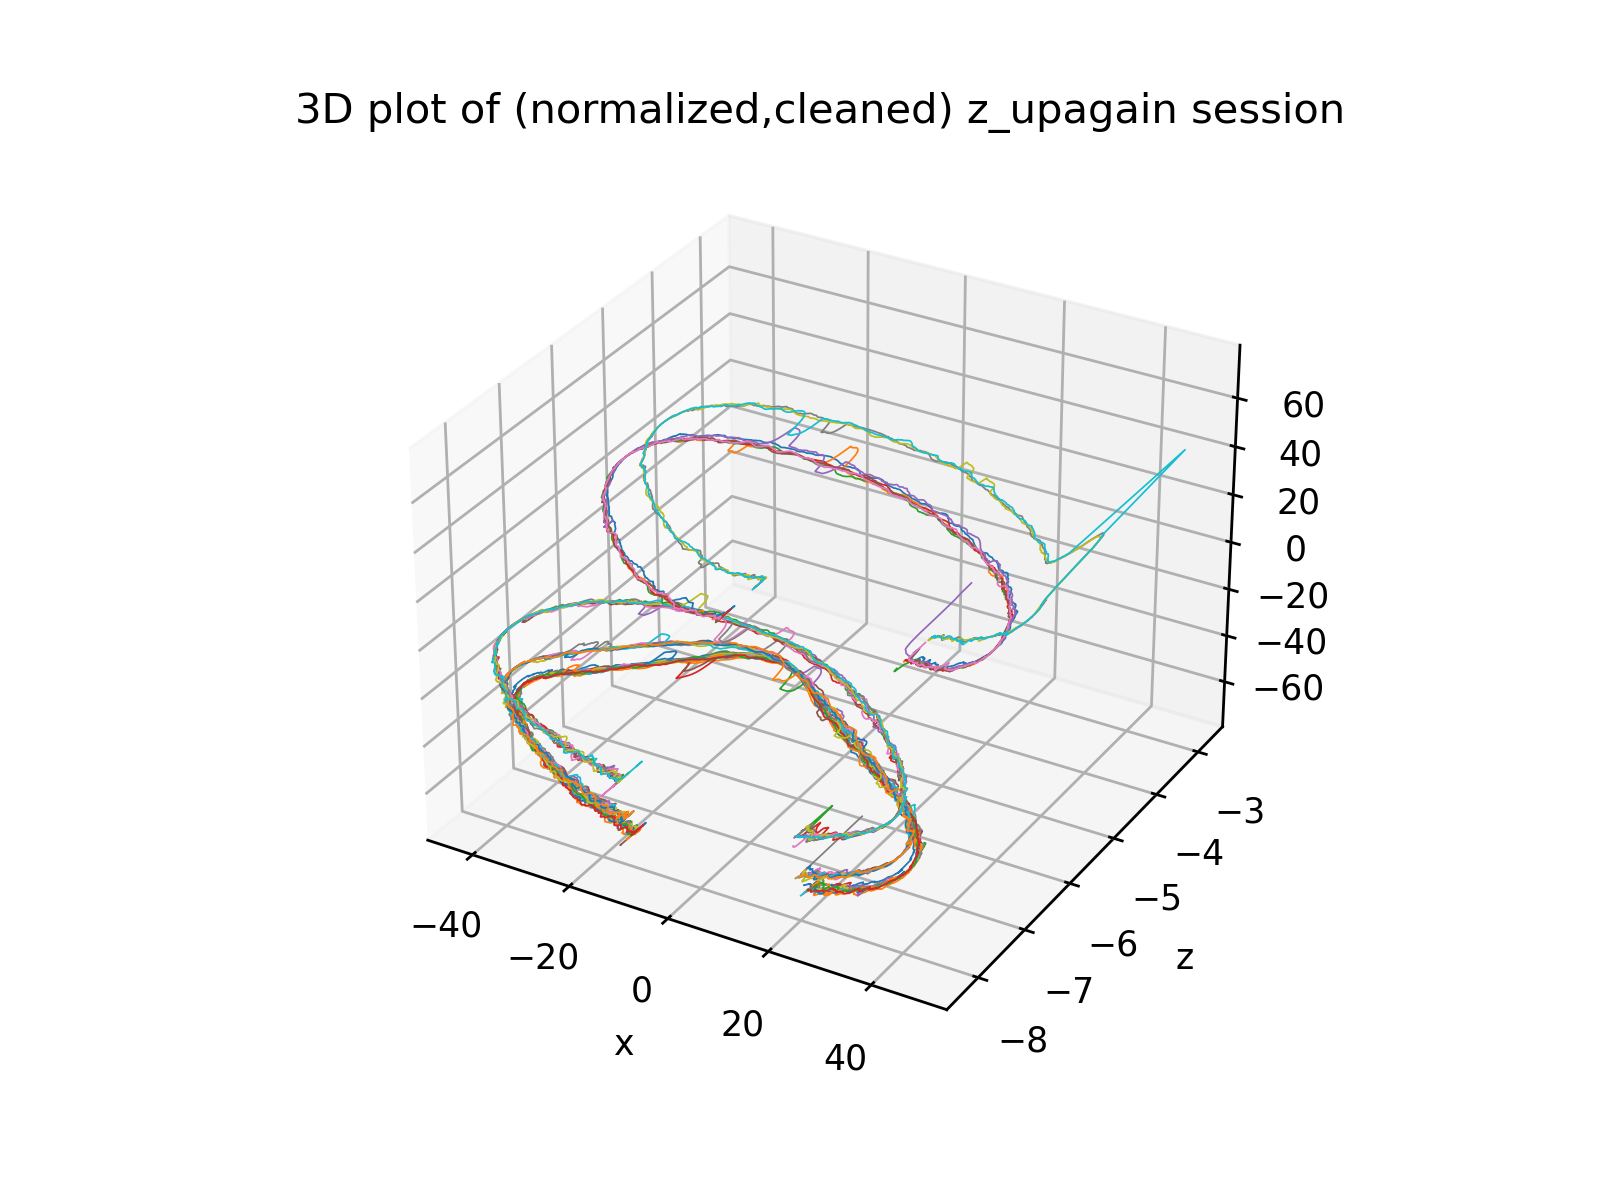

truth error too large: z_upagain_5
--- total of 40 cases plotted ---


Text(0.5, 0.92, '3D plot of (normalized,cleaned) z_upagain session')

In [7]:
%matplotlib notebook
plt.figure(10)
ax = plt.axes(projection='3d')
session = "z_upagain"
session_data = data[session]
for n in range(len(session_data)):
    track_case = session + "_" + str(n+1)
    temp = session_data[track_case]
#     print("truth error: ", temp['truth_err'].mean())
    if( temp['truth_err'].mean()<30 and temp[temp['z_cm']>207].empty):
        temp_normalized, weight = normalize(temp)
        ax.plot3D(temp_normalized['x_cm'], \
                  temp_normalized['z_cm'] - temp_normalized['z_measured'],\
                  temp_normalized['y_cm'], linewidth=0.5)
#         if(n+1 >= 32):
#             ax.plot3D(temp_normalized['x_cm'], \
#                       temp_normalized['z_cm'],\
#                       temp_normalized['y_cm'], linewidth=0.5)
#         else:
#             ax.plot3D(temp_normalized['x_cm'], \
#                       temp_normalized['z_cm'],\
#                       temp_normalized['y_cm'], "--", linewidth = 0.2)
            
    else:
#         ax.plot3D(temp['x_cm'], temp['z_cm'], temp['y_cm'], linewidth=0.5)
        print("truth error too large: " + track_case)
print("--- total of", str(n), "cases plotted ---")



    

# plt.legend()
plt.xlabel("x")
plt.ylabel("z")
plt.title("3D plot of (normalized,cleaned) " +  str(session) + " session")
# plt.ylim(200, 202)
# plt.zlabel("z")
# plt.ioff()


### for blob file comparison

<IPython.core.display.Javascript object>


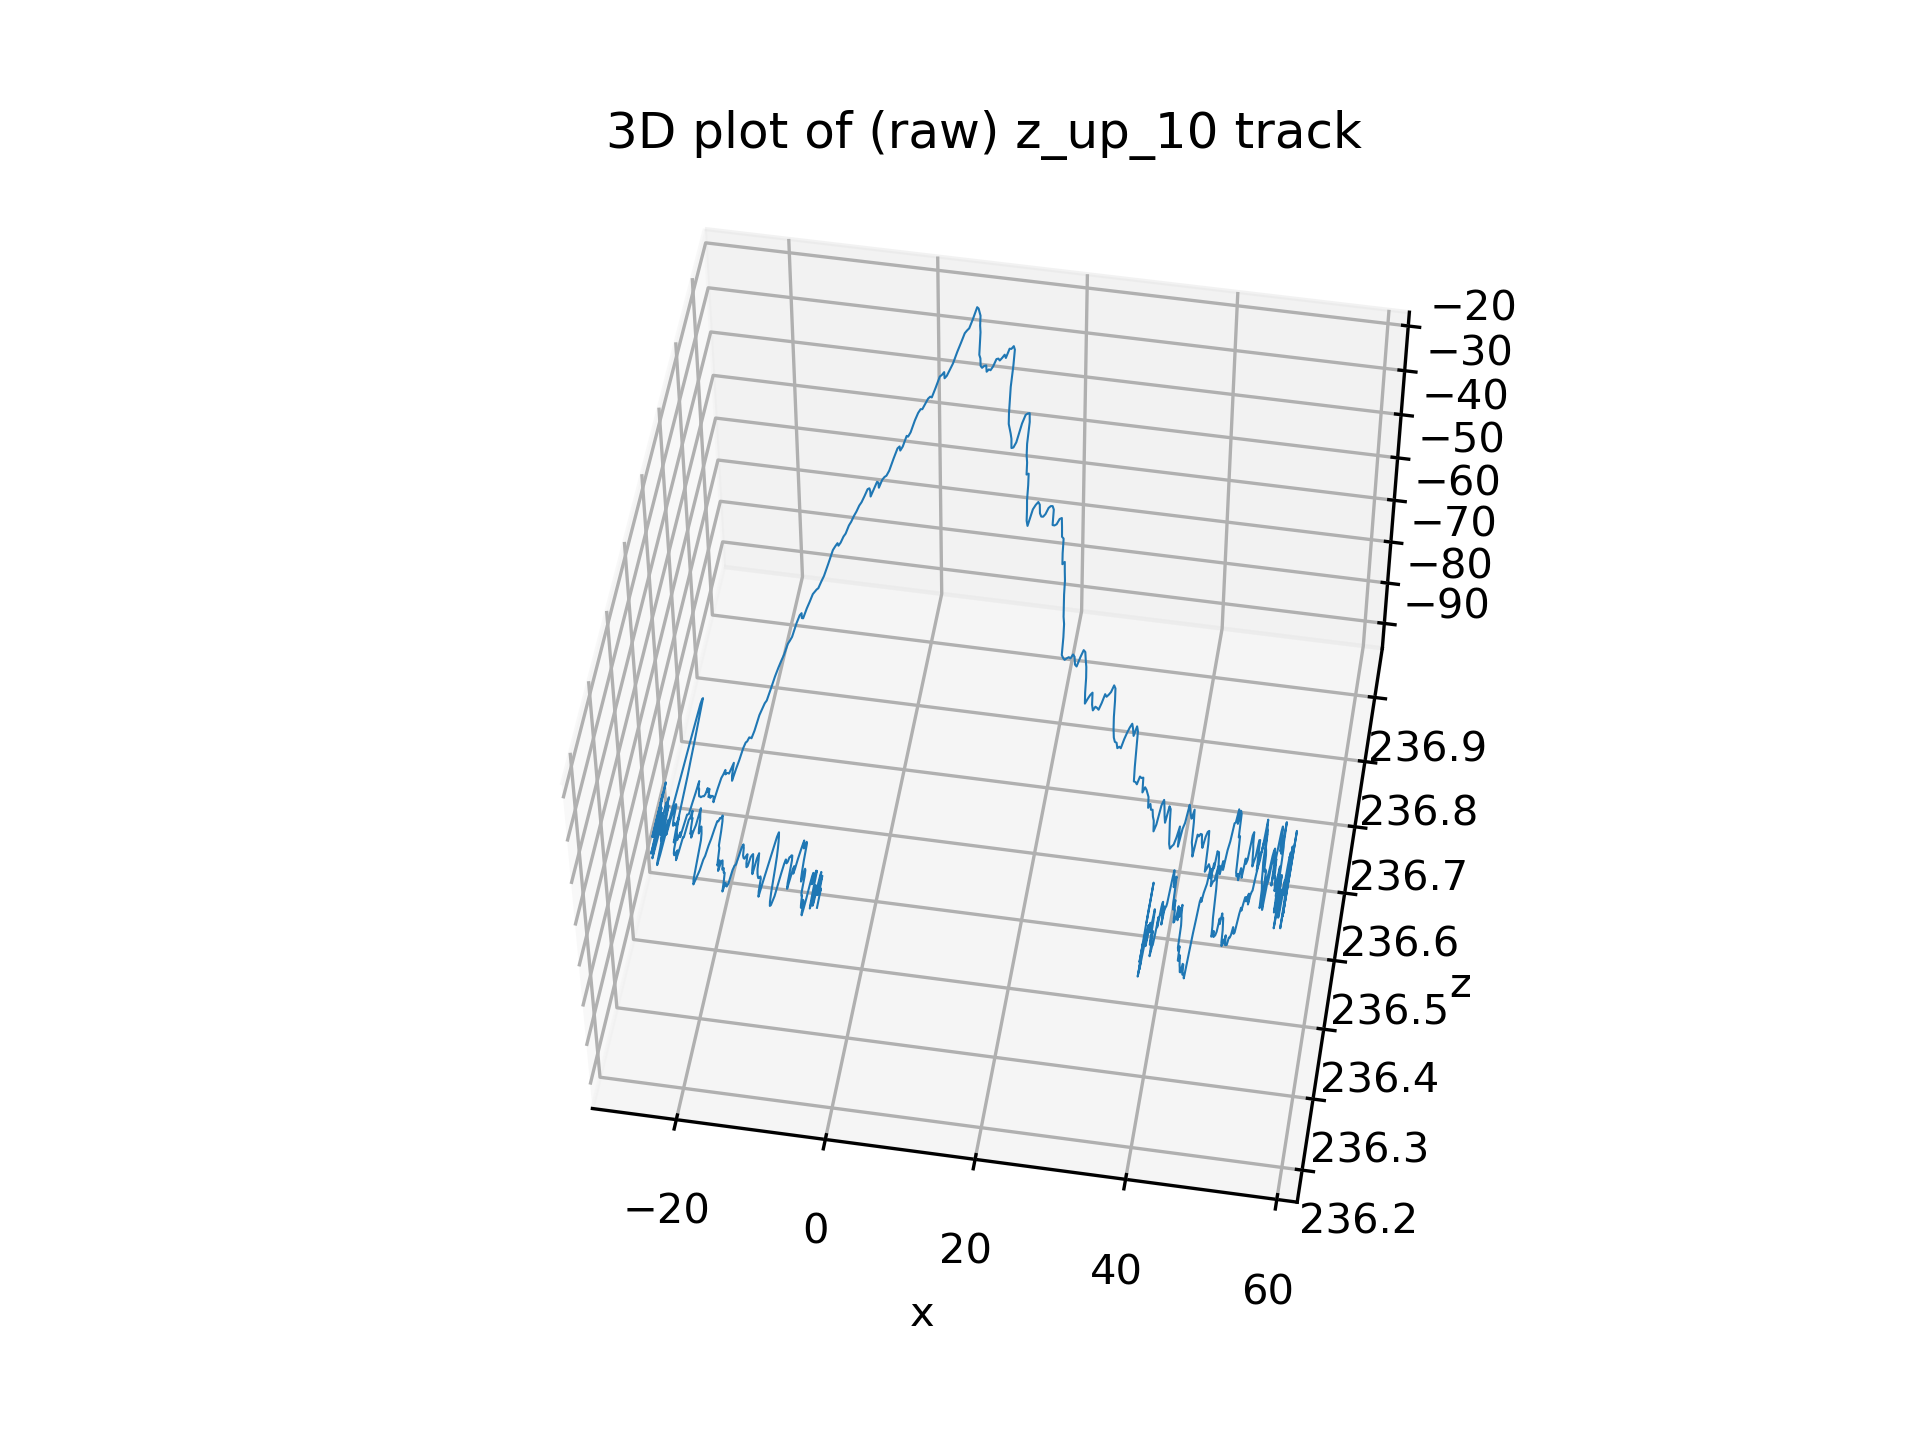

Text(0.5, 0.92, '3D plot of (raw) z_up_10 track')

In [60]:
%matplotlib notebook
plt.figure(11)
ax = plt.axes(projection='3d')
session = "z_up"
session_data = data[session]

track_case = session + "_" + str(10)
temp = session_data[track_case]
temp_normalized, weight = normalize(temp)

ax.plot3D(temp_normalized['x_cm'], \
      temp_normalized['z_cm'],\
      temp_normalized['y_cm'], linewidth=0.5)




    

# plt.legend()
plt.xlabel("x")
plt.ylabel("z")
plt.title("3D plot of (raw) " +  str(track_case) + " track")
# plt.ylim(200, 202)
# plt.zlabel("z")
# plt.ioff()


### Plot z_up session

<IPython.core.display.Javascript object>


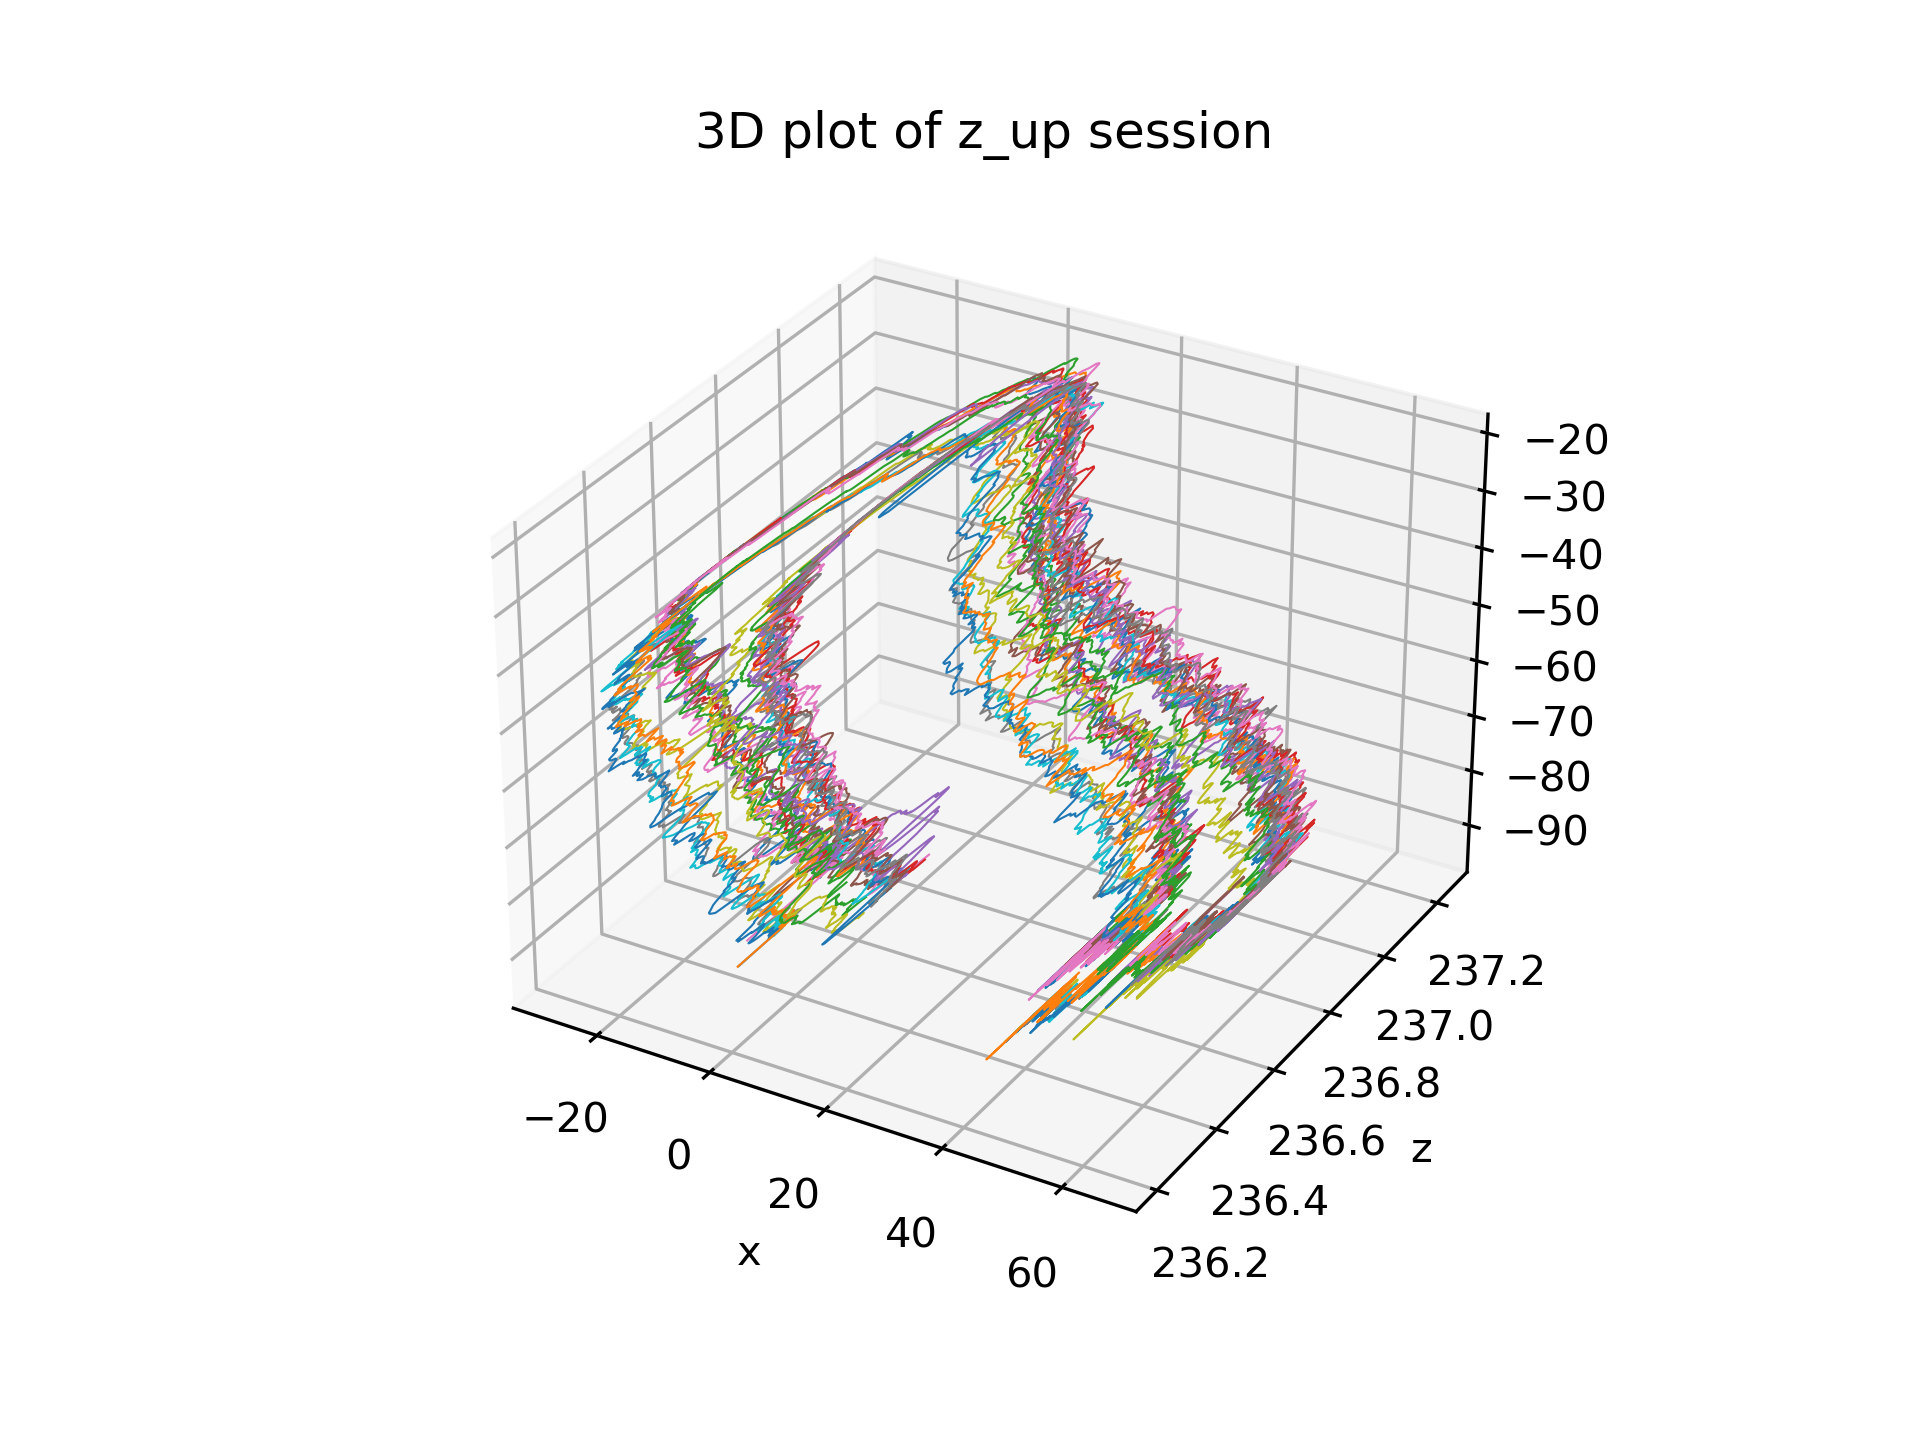

truth error too large: 2022-04-30_00-32-01.csv
truth error too large: 2022-04-30_00-32-01.csv
--- total of 29 cases plotted ---


Text(0.5, 0.92, '3D plot of z_up session')

In [29]:
%matplotlib notebook
plt.figure(1)
ax = plt.axes(projection='3d')
session = "z_up"
session_data = data[session]
for n in range(len(session_data)):
    track_case = session + "_" + str(n+1)
    temp = session_data[track_case]
#     print("truth error: ", temp['truth_err'].mean())
    if( temp['truth_err'].mean()<30):
        temp_normalized, weight = normalize(temp)
        ax.plot3D(temp_normalized['x_cm'], temp_normalized['z_cm'], temp_normalized['y_cm'], linewidth=0.5)
#         print("plotted: " + track_case)
    else:
#         ax.plot3D(temp['x_cm'], temp['z_cm'], temp['y_cm'], linewidth=0.5)
        print("truth error too large: " + track_case)
print("--- total of", str(n), "cases plotted ---")



    

# plt.legend()
plt.xlabel("x")
plt.ylabel("z")
plt.title("3D plot of z_up session")
# plt.ylim(181,185)
# plt.zlabel("z")
# plt.ioff()


#### Comment:
The two tracks that are distant from the group are z_up_14 & z_up_15

### Plot z_up_flipped session

<IPython.core.display.Javascript object>


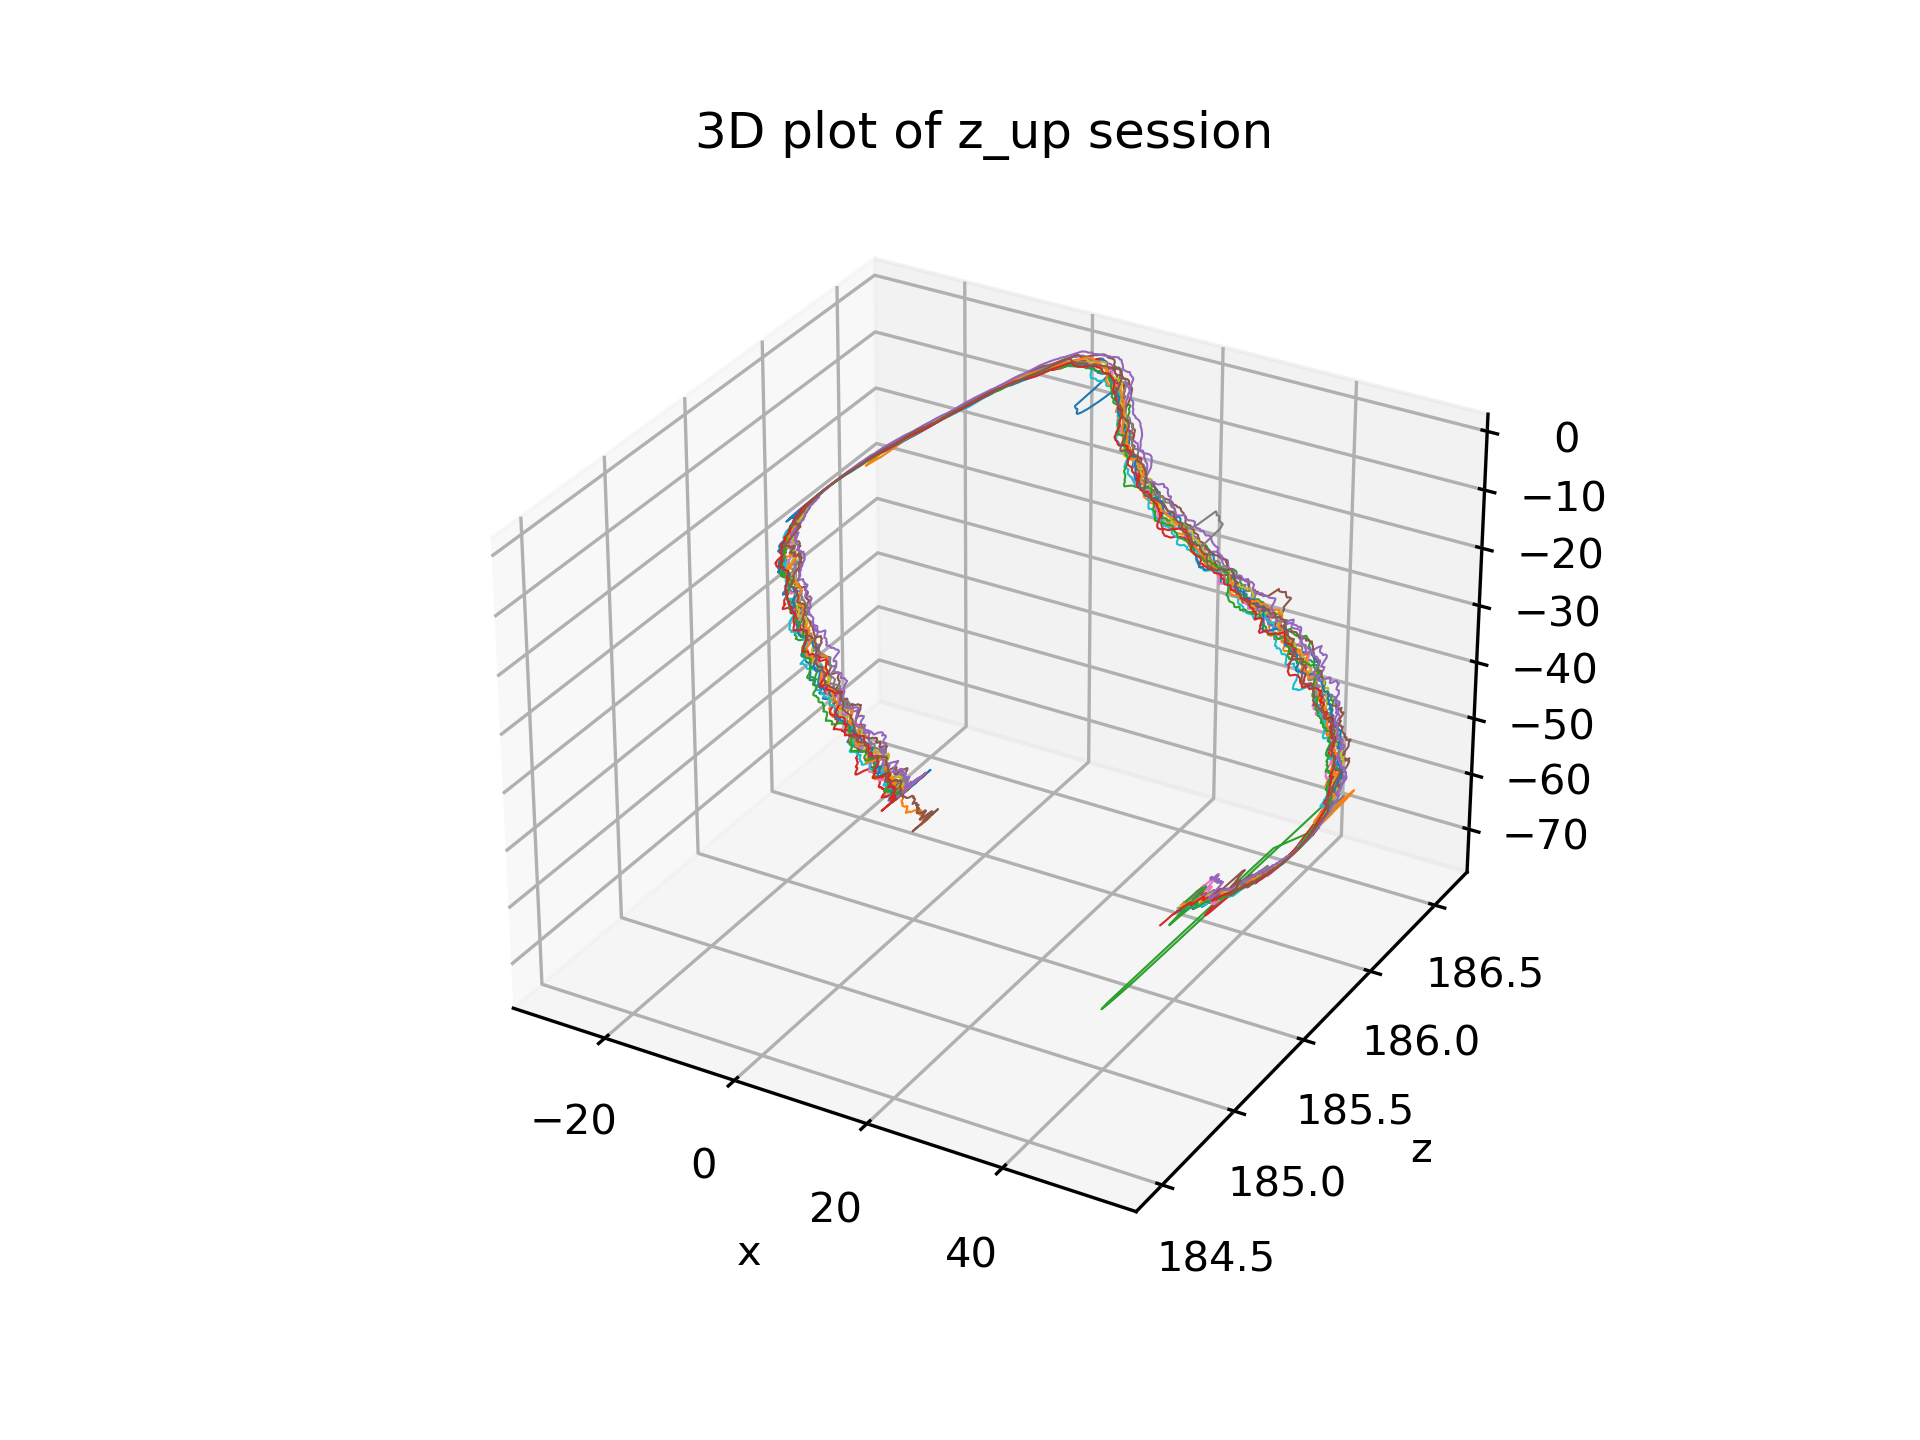

--- total of 15 cases plotted ---


Text(0.5, 0.92, '3D plot of z_up session')

In [30]:
%matplotlib notebook
plt.figure(2)
ax = plt.axes(projection='3d')
session = "z_up_flipped"
session_data = data[session]
for n in range(len(session_data)):
    track_case = session + "_" + str(n+1)
    temp = session_data[track_case]
#     print("truth error: ", temp['truth_err'].mean())
    if( temp['truth_err'].mean()<30):
        temp_normalized, weight = normalize(temp)
        ax.plot3D(temp_normalized['x_cm'], temp_normalized['z_cm'], temp_normalized['y_cm'], linewidth=0.5)
        
#         print("plotted: " + track_case)
    else:
#         ax.plot3D(temp['x_cm'], temp['z_cm'], temp['y_cm'], linewidth=0.5)
        print("truth error too large: " + file_name)
print("--- total of", str(n), "cases plotted ---")    



    

# plt.legend()
plt.xlabel("x")
plt.ylabel("z")
plt.title("3D plot of (normalized) z_up session")
# plt.ylim(181,185)
# plt.zlabel("z")
# plt.ioff()


### Plot z_right

<IPython.core.display.Javascript object>


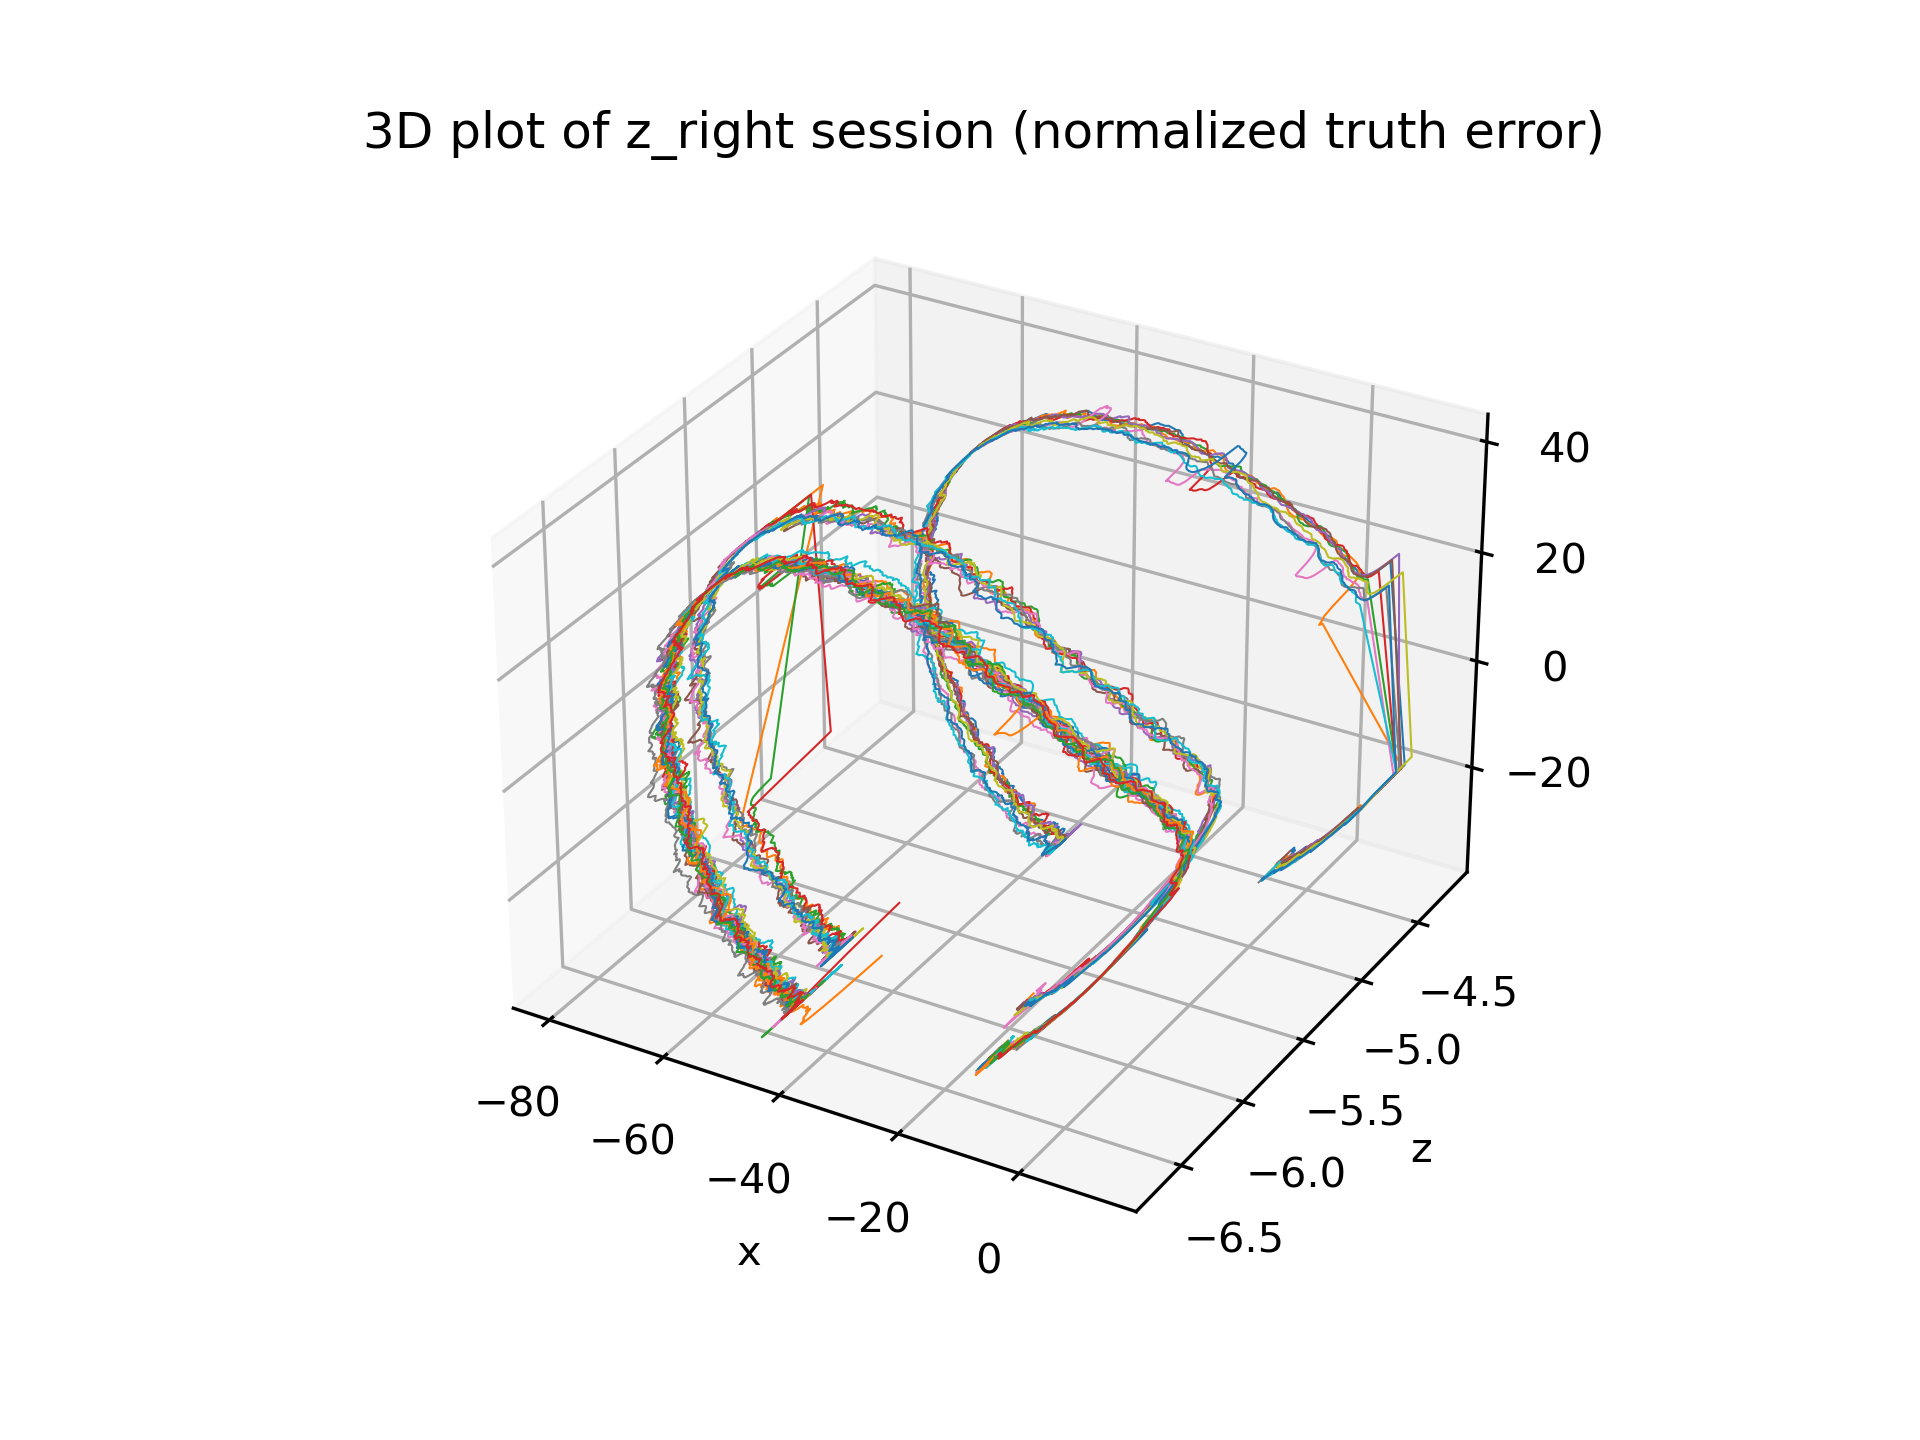

truth error too large: z_right_10
--- total of 44 cases plotted ---


Text(0.5, 0.92, '3D plot of z_right session (normalized truth error)')

In [31]:
%matplotlib notebook
plt.figure(3)
ax = plt.axes(projection='3d')
session = "z_right"
session_data = data[session]
for n in range(len(session_data)):
    track_case = session + "_" + str(n+1)
    temp = session_data[track_case]
#     print("truth error: ", temp['truth_err'].mean())
    if( temp['truth_err'].mean()<30):
        temp_normalized, weight = normalize(temp)
        ax.plot3D(temp_normalized['x_cm'], temp_normalized['z_cm'] - temp_normalized['z_measured'], temp_normalized['y_cm'], linewidth=0.5)
#         print("plotted: " + track_case)
        
    else:
#         ax.plot3D(temp['x_cm'], temp['z_cm'], temp['y_cm'], linewidth=0.5)
        print("truth error too large: " + track_case)
print("--- total of", str(n), "cases plotted ---")    

# plt.legend()
plt.xlabel("x")
plt.ylabel("z")
plt.title("3D plot of z_right session (normalized truth error)")

# plt.zlabel("z")
# plt.ioff()


### Plot z_left

In [ ]:
%matplotlib notebook
plt.figure(4)
ax = plt.axes(projection='3d')
session = "z_left"
session_data = data[session]
for n in range(len(session_data)):
    track_case = session + "_" + str(n+1)
    temp = session_data[track_case]
#     print("truth error: ", temp['truth_err'].mean())
    if( temp['truth_err'].mean()<30):
        temp_normalized, weight = normalize(temp)
        ax.plot3D(temp_normalized['x_cm'], temp_normalized['z_cm'] - temp_normalized['z_measured'], temp_normalized['y_cm'], linewidth=0.5)
#         print("plotted: " + track_case)
        
    else:
#         ax.plot3D(temp['x_cm'], temp['z_cm'], temp['y_cm'], linewidth=0.5)
        print("truth error too large: " + track_case)
print("--- total of", str(n), "cases plotted ---")    

# plt.legend()
plt.xlabel("x")
plt.ylabel("z")
plt.title("3D plot of (normalized) z_left session")

# plt.zlabel("z")
# plt.ioff()


## debug z_neardown error

<IPython.core.display.Javascript object>


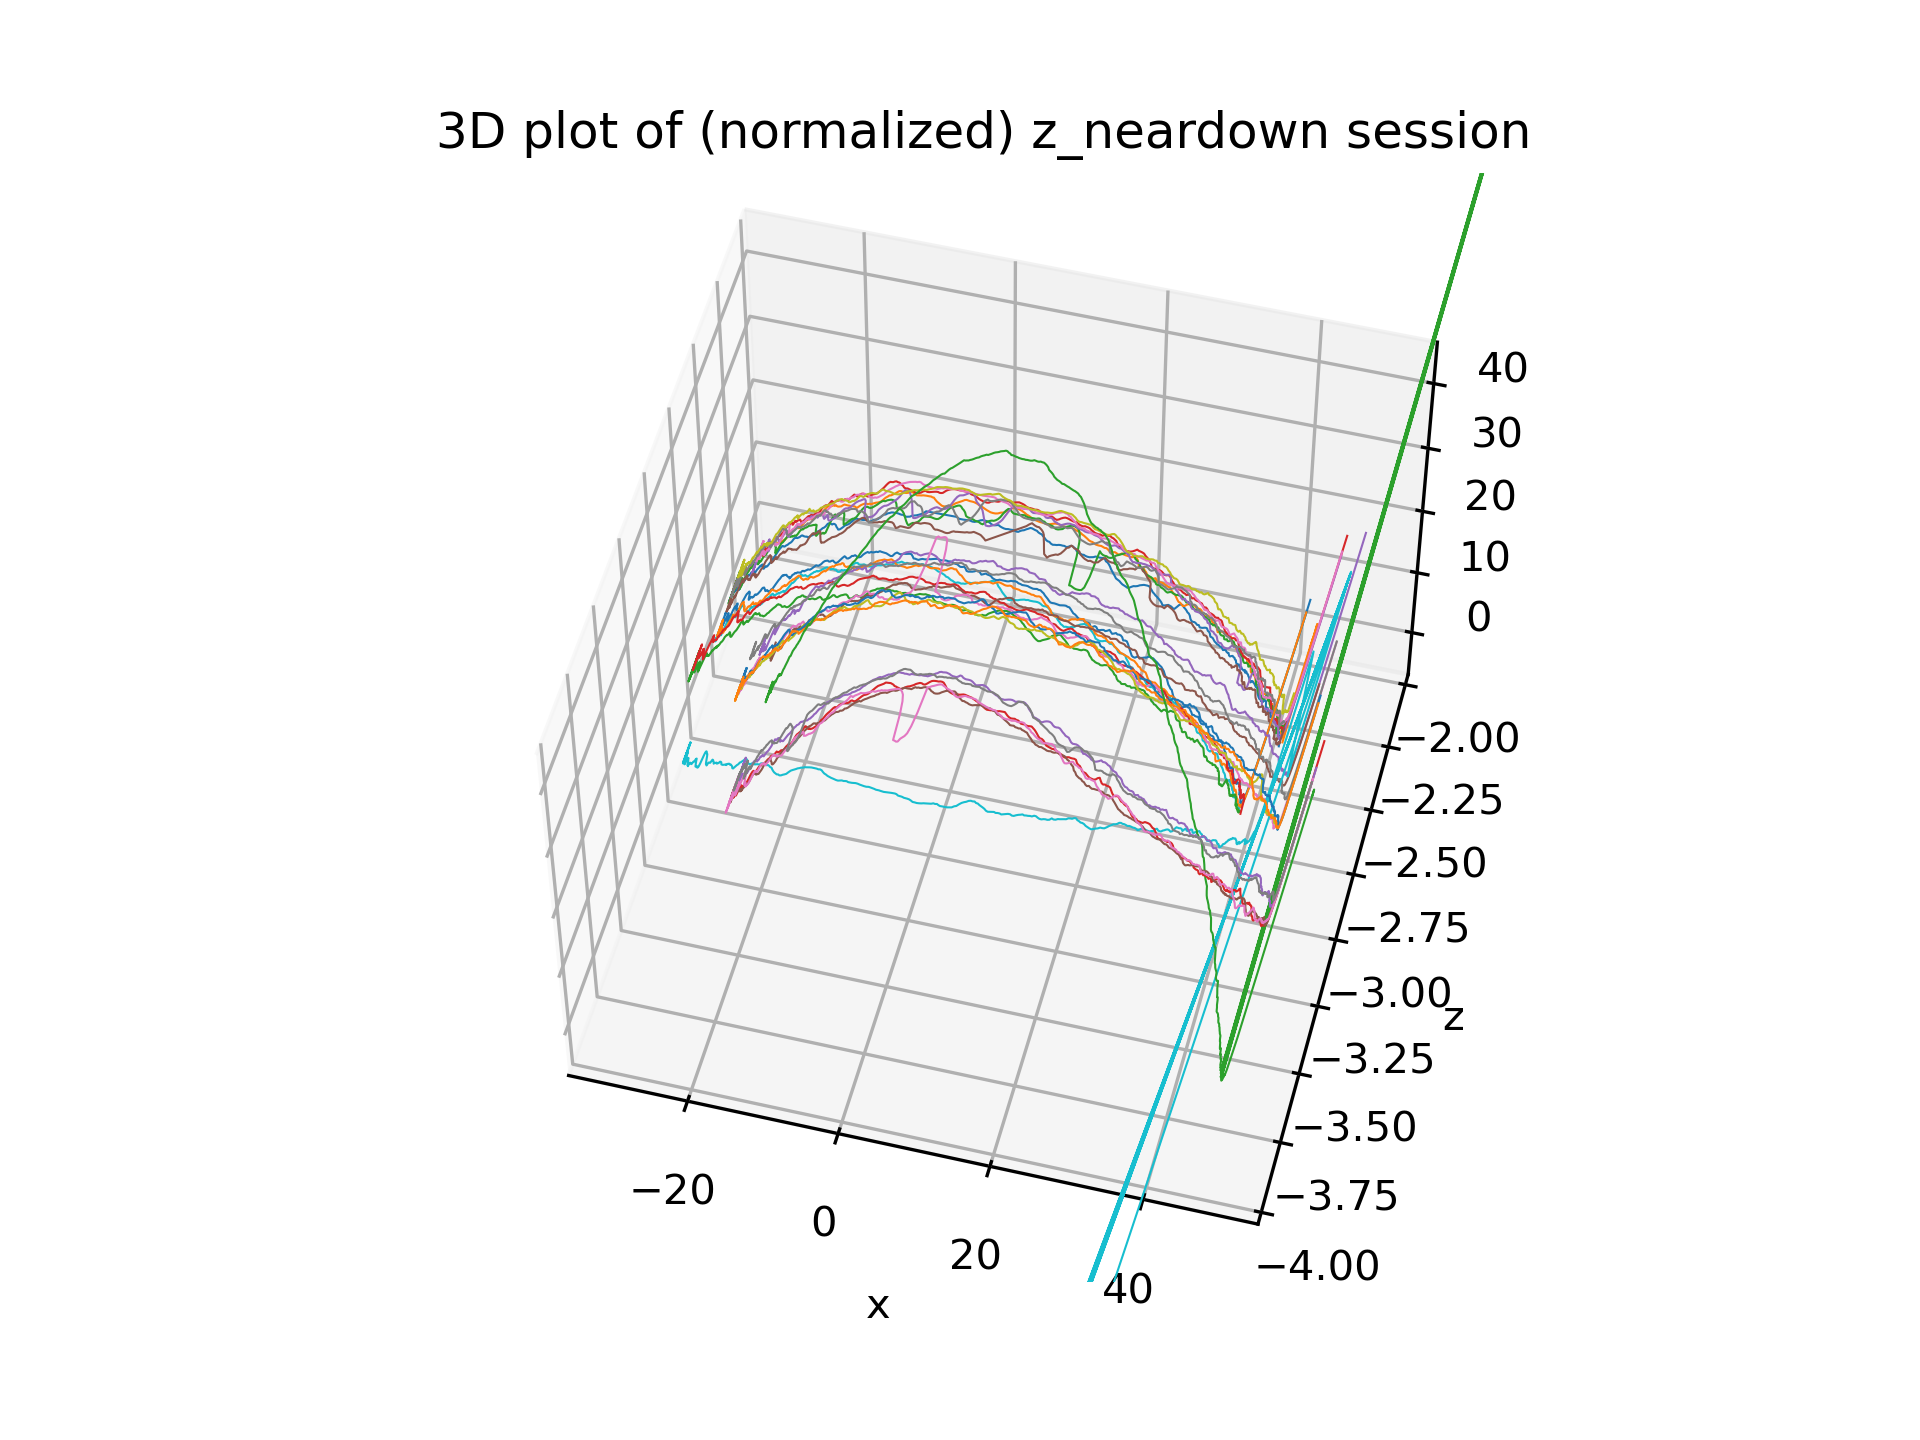

--- total of 27 cases plotted ---


(-4.0, -2.0)

In [57]:
%matplotlib notebook
plt.figure(10)
ax = plt.axes(projection='3d')
session = "z_neardown"
session_data = data[session]
for n in range(len(session_data)):
    track_case = session + "_" + str(n+12)
    try:
        temp = session_data[track_case]
    except:
        break
    if( temp['truth_err'].mean()<30):
        temp_normalized, weight = normalize(temp)
        ax.plot3D(temp_normalized['x_cm'], \
                  temp_normalized['z_cm'] - temp_normalized['z_measured'], \
                  temp_normalized['y_cm'], linewidth=0.5)
#         print("plotted: " + track_case)
    else:
#         ax.plot3D(temp['x_cm'], temp['z_cm'], temp['y_cm'], linewidth=0.5)
        print("truth error too large: " + track_case)
print("--- total of", str(n), "cases plotted ---")


# plt.legend()
plt.xlabel("x")
plt.ylabel("z")
plt.title("3D plot of (normalized) " +  str(session) + " session")
plt.ylim(-4,-2)
# plt.zlabel("z")
# plt.ioff()


<IPython.core.display.Javascript object>


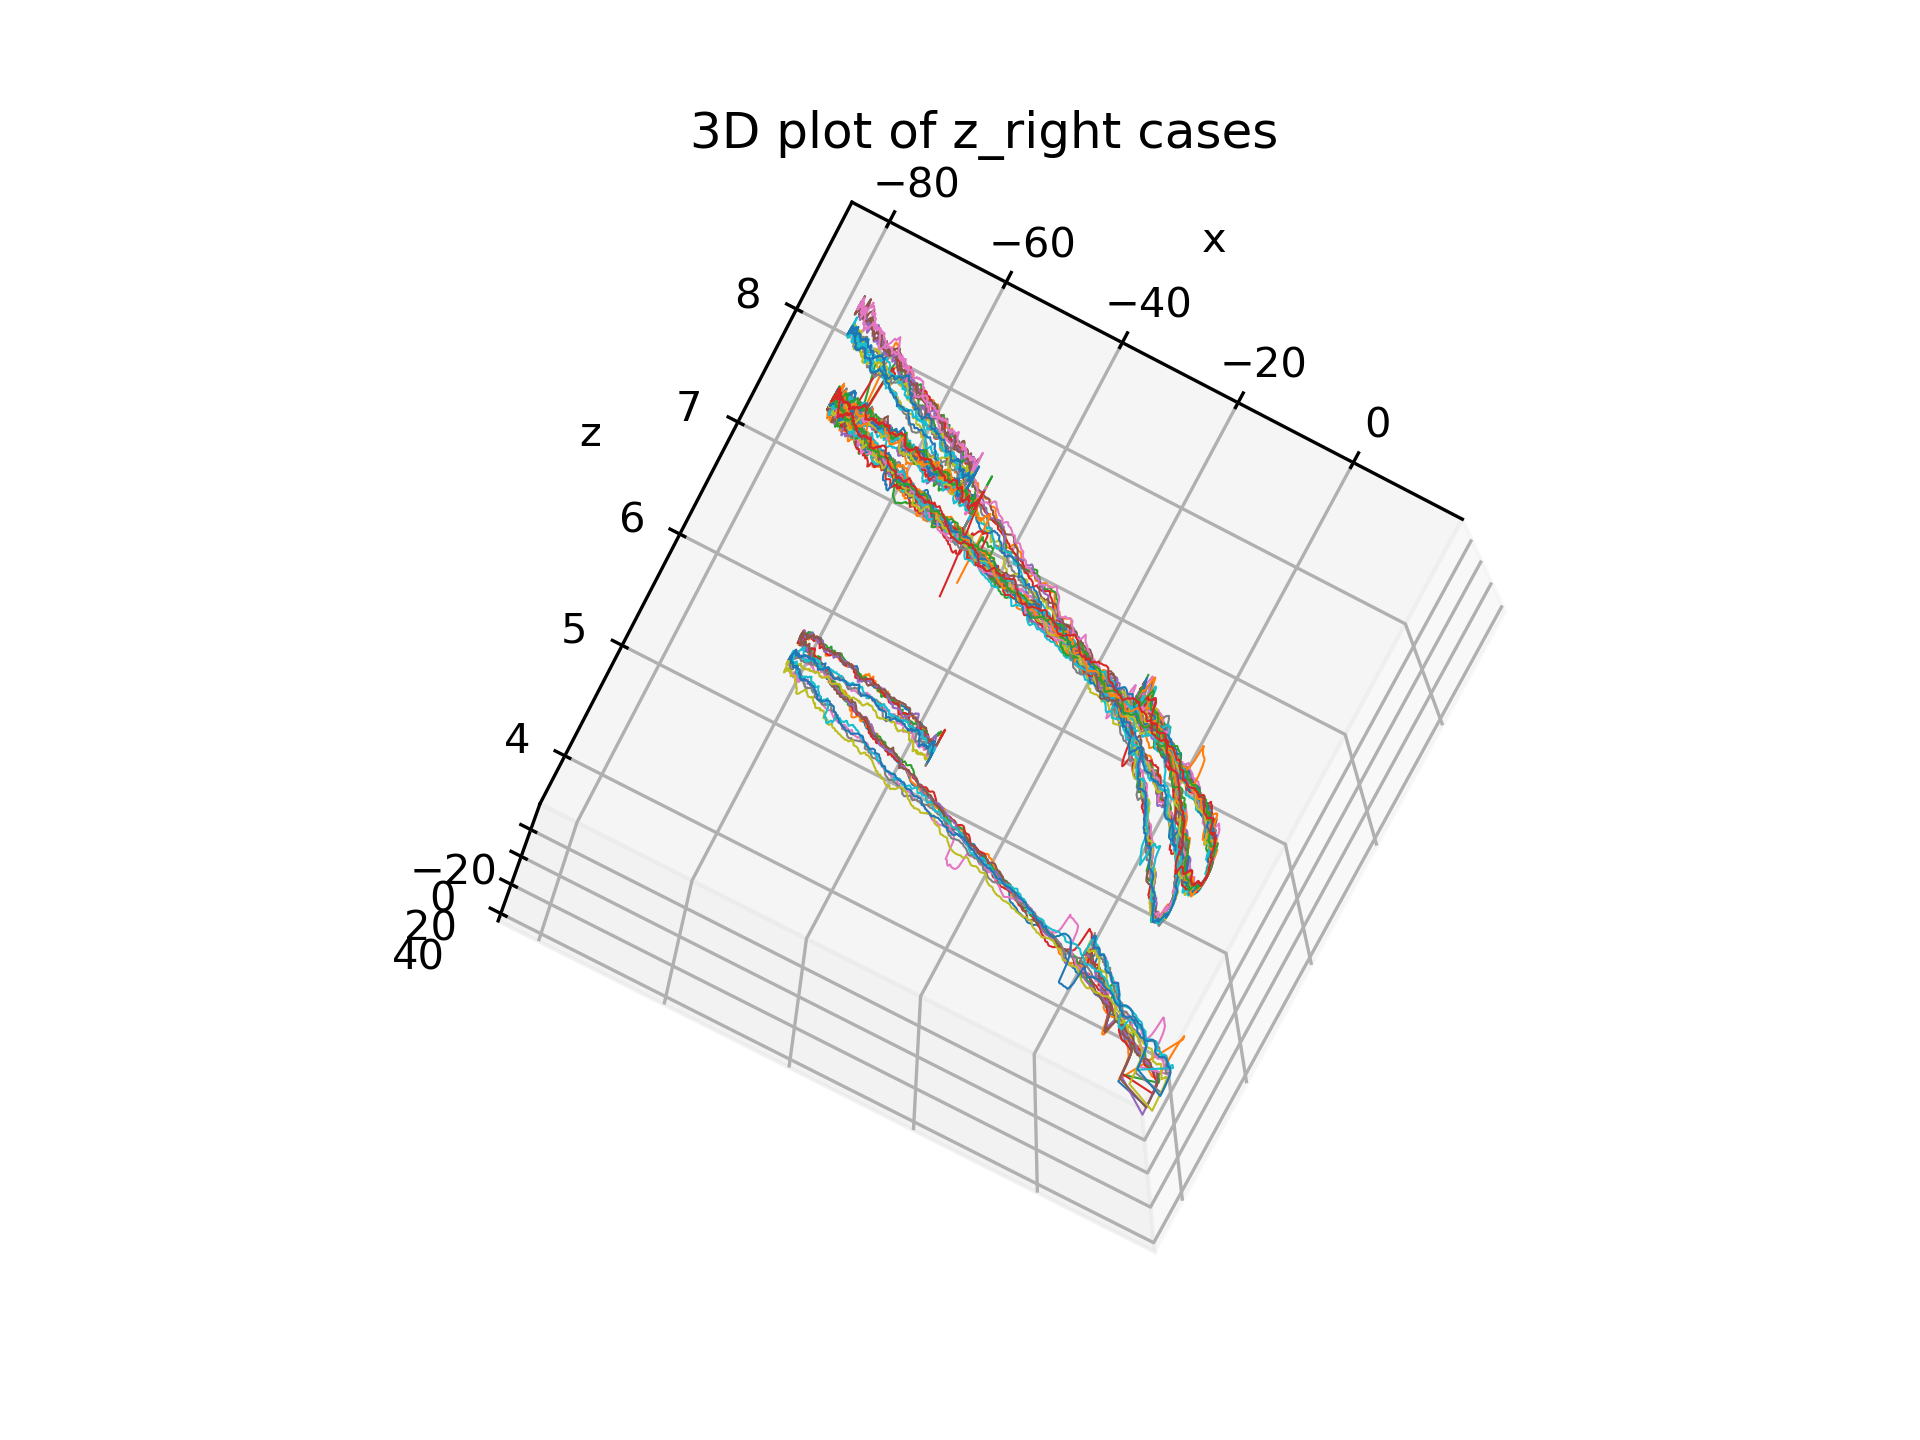

plotted: z_right_1
plotted: z_right_2
plotted: z_right_3
plotted: z_right_4
plotted: z_right_5
plotted: z_right_6
plotted: z_right_7
plotted: z_right_8
plotted: z_right_9
error too large z_right_10
plotted: z_right_11
plotted: z_right_12
plotted: z_right_13
plotted: z_right_14
plotted: z_right_15
plotted: z_right_16
plotted: z_right_17
plotted: z_right_18
plotted: z_right_19
plotted: z_right_20
plotted: z_right_21
plotted: z_right_22
plotted: z_right_23
plotted: z_right_24
plotted: z_right_25
plotted: z_right_26
plotted: z_right_27
plotted: z_right_28
plotted: z_right_29
plotted: z_right_30
plotted: z_right_31
plotted: z_right_32
plotted: z_right_33
plotted: z_right_34
plotted: z_right_35
plotted: z_right_36
plotted: z_right_37
plotted: z_right_38
plotted: z_right_39
plotted: z_right_40
plotted: z_right_41
plotted: z_right_42
plotted: z_right_43
plotted: z_right_44
plotted: z_right_45


Text(0.5, 0.92, '3D plot of z_right cases')

In [9]:
%matplotlib notebook

plt.figure(3)
ax = plt.axes(projection='3d')
## plot z_up_flipped
for n in range(45):
    file_name = "z_right_" + str(n+1)
    temp = data[file_name]
#     ax.plot3D(temp['x_cm'], temp['truth_err'], temp['y_cm'], linewidth=0.8)
#     print("plotted: " + file_name)
    if(temp[temp['truth_err']>30].empty ):
        # plots if all points are below x<30
        ax.plot3D(temp['x_cm'], temp['truth_err'], temp['y_cm'], linewidth=0.5)
        print("plotted: " + file_name)
    else:
        print("error too large " + file_name)

#     if(temp[temp['x_cm']>30].empty and temp[temp['z_cm']<180].empty):
#         # plots if all points are below x<30
#         ax.plot3D(temp['x_cm'], temp['z_cm'], temp['y_cm'], linewidth=0.5)
#         print("plotted: " + file_name)
#     else:
#         print("data values to the right: " + file_name)

        



plt.xlabel("x")
plt.ylabel("z")
plt.title("3D plot of z_right cases with z_error")

In [100]:
test = data['z_right_1']



145    4.27394
Name: truth_err, dtype: float64

## z_left & z_right manually matching

<IPython.core.display.Javascript object>


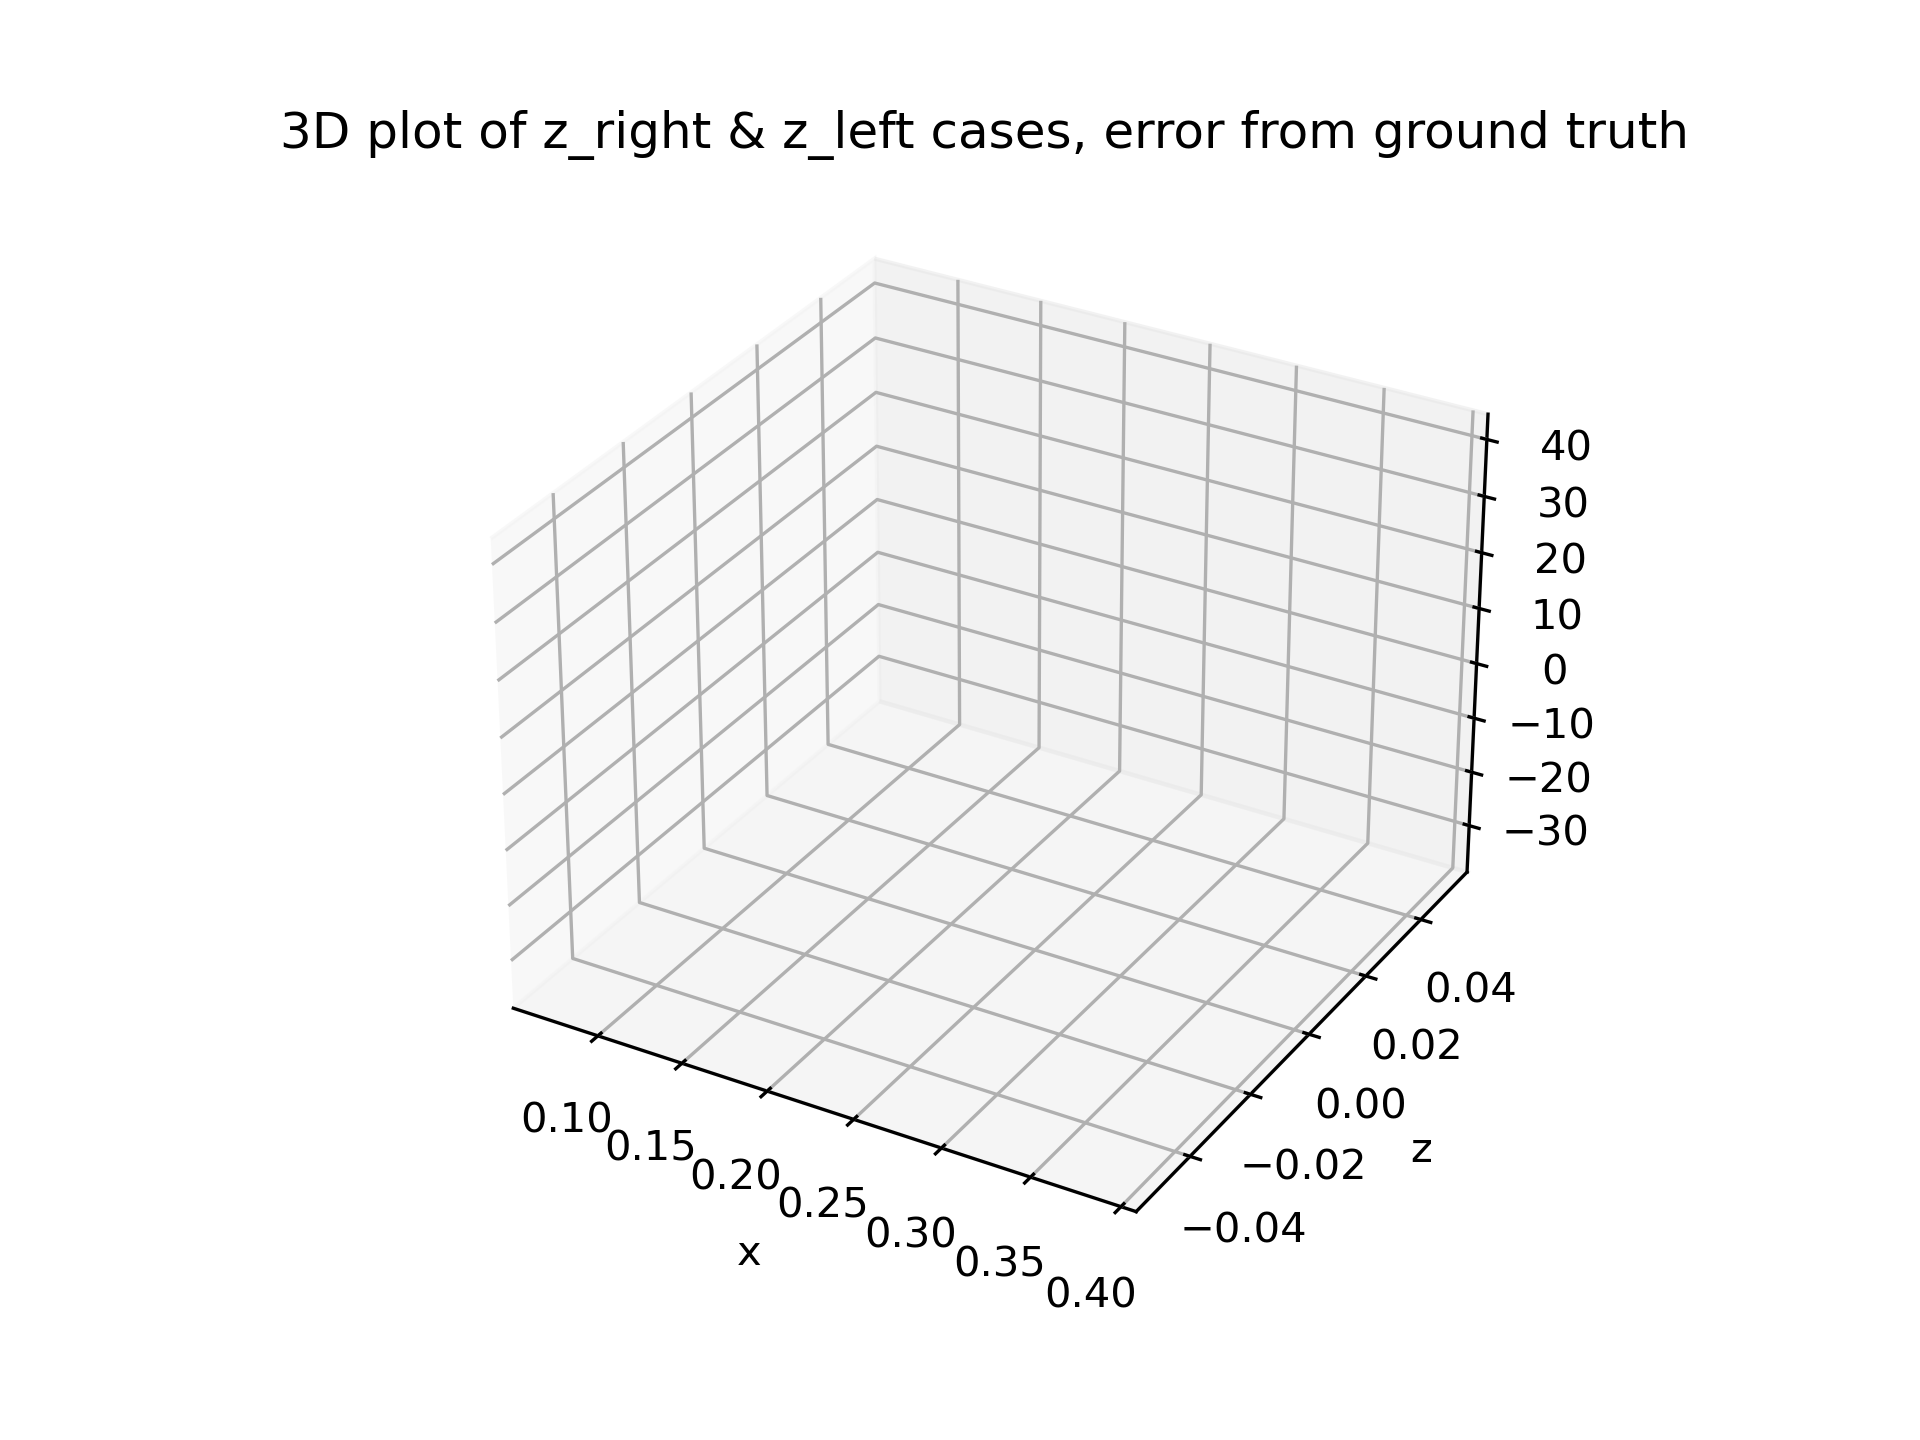


z_offset:  145    4.27394
Name: truth_err, dtype: float64

z_offset:  154    4.85943
Name: truth_err, dtype: float64

z_offset:  151    3.9672
Name: truth_err, dtype: float64

z_offset:  152    3.97297
Name: truth_err, dtype: float64

z_offset:  145    4.20555
Name: truth_err, dtype: float64

z_offset:  153    4.26724
Name: truth_err, dtype: float64

z_offset:  162    4.1059
Name: truth_err, dtype: float64

z_offset:  167    4.05314
Name: truth_err, dtype: float64

z_offset:  166    3.95073
Name: truth_err, dtype: float64

z_offset:  801    56.7098
Name: truth_err, dtype: float64

z_offset:  163    4.0785
Name: truth_err, dtype: float64

z_offset:  162    4.08561
Name: truth_err, dtype: float64

z_offset:  241    5.51746
Name: truth_err, dtype: float64

z_offset:  244    5.39376
Name: truth_err, dtype: float64

z_offset:  238    5.43659
Name: truth_err, dtype: float64

z_offset:  246    5.42652
Name: truth_err, dtype: float64

z_offset:  243    5.4421
Name: truth_err, dtype: float64



Text(0.5, 0.92, '3D plot of z_right & z_left cases, error from ground truth')

In [113]:
%matplotlib notebook

plt.figure(5)
ax = plt.axes(projection='3d')

for n in range(45):
    file_name = "z_right_" + str(n+1)
    temp = data[file_name]
    max_x = temp['x_cm'].max()
    max_error = temp['truth_err'].max()
    z_offset = temp['truth_err'][temp['x_cm'] == max_x]
    print("\nz_offset: ", z_offset)
#     print("max_x: " , max_x, "\nz_offset: ", z_offset, "\nmax error: ", max_error)
#     plt.plot(np.arange(len(temp['truth_err'])), temp['truth_err'])
#     if(temp[temp['x_cm']<-30].empty):
#         # plots if all points are below x<30
#         print("track too far off: " + file_name)
#     else:
#         ax.plot3D(temp['x_cm'], temp['truth_err'], temp['y_cm'], 'k', linewidth=0.8)
#         print("plotted: " + file_name)
# for n in range(13,23):
#     file_name = "z_right_" + str(n+1)
#     temp = data[file_name]
#     ax.plot3D(temp['x_cm'], temp['truth_err'], temp['y_cm'], linewidth=0.8)
#     print("plotted: " + file_name)
#     if(temp[temp['x_cm']>30].empty and temp[temp['z_cm']<180].empty):
#         # plots if all points are below x<30
#         ax.plot3D(temp['x_cm'], temp['truth_err'], temp['y_cm'], linewidth=0.5)
#         print("plotted: " + file_name)
#     else:
#         print("data values to the right: " + file_name)

# for n in range(23,45):
#     file_name = "z_right_" + str(n+1)
#     temp = data[file_name]
#     ax.plot3D(temp['x_cm'], temp['truth_err'], temp['y_cm'], linewidth=0.1)
#     print("plotted: " + file_name)

#     if(temp[temp['x_cm']>30].empty and temp[temp['z_cm']<180].empty):
#         # plots if all points are below x<30
#         ax.plot3D(temp['x_cm'], temp['truth_err'], temp['y_cm'], linewidth=0.5)
#         print("plotted: " + file_name)
#     else:
#         print("data values to the right: " + file_name)

        
for n in range(25):
    file_name = "z_left_" + str(n+1)
    temp = data[file_name]
#     max_x = 
    ax.plot3D(temp['x_cm'], temp['truth_err'] - temp['truth_err'][temp['x_cm']<=temp['x_cm'].min()], temp['y_cm'], 'r', linewidth=0.8)
    print("plotted: " + file_name)
#     if(temp[temp['x_cm']>30].empty and temp[temp['z_cm']<180].empty):
#         # plots if all points are below x<30
#         ax.plot3D(temp['x_cm'], temp['z_cm'], temp['y_cm'], linewidth=0.5)
#         print("plotted: " + file_name)
#     else:
#         print("data values to the right: " + file_name)


plt.xlabel("x")
plt.ylabel("z")
plt.title("3D plot of z_right & z_left cases, error from ground truth")

## <span style="color:red">There was a problem with the z_up_13 file download, put into problematic data files and re-downloaded the csv from pfmd website </span>

In [9]:

# %matplotlib notebook
# plt.figure(2)
# ax = plt.axes(projection='3d')
# z_up_13 = pd.read_csv("../pfmdData/z_up_13_debug.csv")
# weird = pd.read_csv("../pfmdData/data_heatMap/z_up/2022-04-19_20-25-30.csv")

# ax.plot3D(z_up_13['x_cm'], z_up_13['z_cm'], z_up_13['y_cm'], linewidth=0.5)
# ax.show()